<a href="https://colab.research.google.com/github/elqvixote/CODIGO_TRADING_R_PLATZI/blob/master/05_Tama%C3%B1o_optimo_de_la_Muestra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paquetes 

install.packages("devtools")
install.packages("caret")
devtools::install_github("nebulae-co/saber")

library("saber")
library("nnet")
library("caret")
library("parallel")

data("SB11_20112")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’





✔  checking for file ‘/tmp/RtmpF543UA/remotes3836f3f489/nebulae-co-saber-04cded4/DESCRIPTION’
─  preparing ‘saber’: (334ms)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘saber_0.0.0.9500.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2



In [ ]:
# función de pliegue

rmse_fold <- function(pliegue, form, datos,  nn_size){
  pliegue_logic <- seq_len(nrow(datos)) %in% pliegue
  entrena <- subset(datos, !pliegue_logic)
  prueba <- subset(datos, pliegue_logic)
  modelo <- nnet(form, data = datos, size = nn_size, linout = TRUE, trace = FALSE)
  response_name <- setdiff(names(datos), modelo$coefnames)
  Y_pronosticado <- predict(modelo, newdata = prueba)
  rmse <- RMSE(Y_pronosticado, prueba[[response_name]])
  rmse
}

In [ ]:
calcula_rmse_tam <-function(tamano_muestral){
  indices_muestra <- seq_len(nrow(SB11_20112)) %in% sample(seq_len(nrow(SB11_20112)), tamano_muestral)
  
  muestra <- subset(SB11_20112, subset = indices_muestra, select = variables)
  muestra <- na.omit(muestra)
  
  createFolds(muestra$MATEMATICAS_PUNT, k = n_pliegues) -> pliegues
  
  lapply(
    pliegues,
    rmse_fold, 
    MATEMATICAS_PUNT ~., 
    muestra, 
    nn_size = neuronas 
  ) -> rmse_pliegues
  mean(unlist(rmse_pliegues))
}

In [ ]:
tamano_muestral_max <- 10000
iteraciones <- 20
tamano_muestral <- floor(seq(500, tamano_muestral_max, length.out = iteraciones))
n_pliegues <- 4
neuronas <- 20


c(
  "ECON_PERSONAS_HOGAR",
  "ECON_CUARTOS",
  "ECON_SN_LAVADORA",
  "ECON_SN_NEVERA",
  "ECON_SN_HORNO",
  "ECON_SN_DVD",
  "ECON_SN_MICROHONDAS",
  "ECON_SN_AUTOMOVIL",
  "MATEMATICAS_PUNT"
) -> variables

In [ ]:
mclapply(
  tamano_muestral,
  calcula_rmse_tam,
  mc.cores = 7
) -> rmse_por_tam

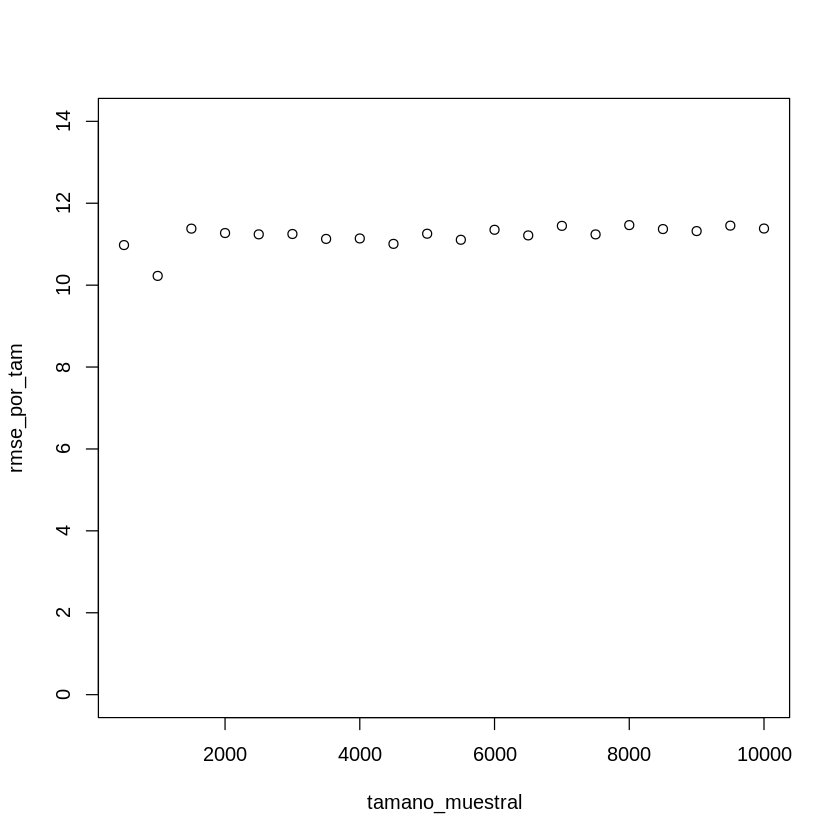

In [ ]:
rmse_por_tam <- unlist(rmse_por_tam)

plot(tamano_muestral, rmse_por_tam, ylim = c(0, 14))

In [ ]:
# Interpretación

tamano_muestral <- 5000

indices_muestra <- seq_len(nrow(SB11_20112)) %in% sample(seq_len(nrow(SB11_20112)), tamano_muestral)
  
muestra <- subset(SB11_20112, subset = indices_muestra, select = variables)
muestra <- na.omit(muestra)

red_neuronal <- nnet(MATEMATICAS_PUNT ~ ., data = muestra, size = neuronas, linout = TRUE)

# weights:  201
initial  value 10843422.429035 
iter  10 value 662002.729610
iter  20 value 652758.528229
iter  30 value 650121.170879
iter  40 value 646989.494495
iter  50 value 644746.599166
iter  60 value 643214.944941
iter  70 value 641174.349394
iter  80 value 639384.355918
iter  90 value 636465.569591
iter 100 value 634769.886185
final  value 634769.886185 
stopped after 100 iterations


In [ ]:
predict(red_neuronal, newdata = SB11_20112) -> puntaje_pronosticado

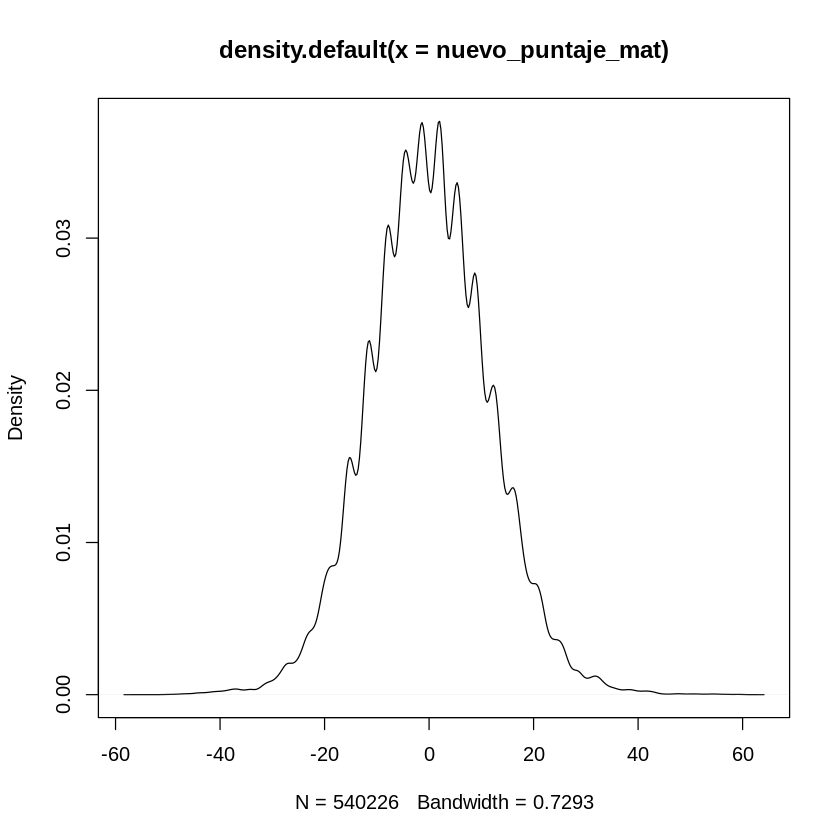

In [ ]:
nuevo_puntaje_mat <- SB11_20112$MATEMATICAS_PUNT - puntaje_pronosticado
nuevo_puntaje_mat <- na.omit(nuevo_puntaje_mat)

plot(density(nuevo_puntaje_mat))